In [ ]:
# we are amminig for a G 
# Mouayad Mouayad h20moumo
# mohamed almefrej 

In [698]:
%pylab inline
from pandas import *
import numpy
import matplotlib

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['array', 'unique', 'plotting', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


array([[ 0, -1,  0, -5],
       [ 0,  0,  0,  5],
       [ 0,  0, -1,  0],
       [ 0,  0, -1,  0]])

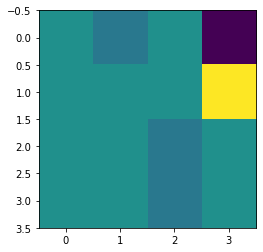

In [705]:
def generateWumpusWorld():
    b=[]
    for x in range(4):
        x=list()
        b.append(x)
        for i in range(4):
            x.append(0)
        stuff=[-5,+5,-1,-1,-1]

    for s in stuff:
        x=randint(4)
        y=randint(4)
        if x !=0 or y != 0:
            b[x][y]=s
    world=numpy.array(b)
    return world

wumpusWorld=generateWumpusWorld()

imshow(wumpusWorld)
wumpusWorld
#-1 is a pit -1000 + -1
#-5 is a wumpus -1000 + -1
# 5 is gold +1000 + -1
# 0 is w open way -1 

In [706]:
# return the gold location in the world
def goldLocation():
    for x in range(4):
        for y in range(4):
            if wumpusWorld[x][y]==5:
                return x,y
    return False

a=goldLocation()
print(a)

(1, 3)


In [711]:
# return all valid neighbors
def getNeighbors(x,y):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for i in range(4):
        direction=[x+xm[i],y+ym[i]]
        if direction[0] == -1 or direction[1] == -1:
            continue
        if direction[0] == 4 or direction[1]== 4:
            continue
        else:
            nb.append([x+xm[i],y+ym[i]])
    return nb

5

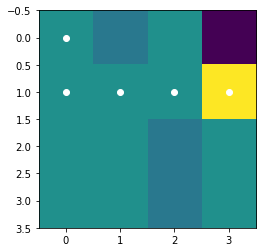

In [712]:
# depth-first search algorithm
start_location=[0,0] #our start 
targetGold=goldLocation()
if targetGold == False:
    wumpusWorld=generateWumpusWorld()
target_location=[targetGold[0],targetGold[1]] # our target 
distances=numpy.zeros(wumpusWorld.shape)-1  
front=[start_location] #we add start location to our front
# we says that the steps to start location is zero 
distances[start_location[0]][start_location[1]]=0 
# and our step is one
currentDistance=1
n=0
while len (front) > 0: # while our front is not emty 
    n+=1
    newFront=list()
    # loop over all our neighbors
    for currentLoction in front:
        #the neighbors for the current location
        neighbors=getNeighbors(currentLoction[0],currentLoction[1])
#         print(neighbors,n)
        # print those neighbors 
#         print(neighbors)
        # we loop throw all neighbors of neighbors
        for nb in neighbors:
            #we make sure that we are going on open ways that are 0
            # and we make sure that what we alrady visited
            # will not be visited again
            if wumpusWorld[nb[0]][nb[1]] == 0 and distances[nb[0]][nb[1]]<0.0:
                #if that is true these steps are our current steps
                distances[nb[0]][nb[1]]=currentDistance
                # we add the valied neighbor to our new front
                newFront.append(nb)
            if wumpusWorld[nb[0]][nb[1]] == 5  and distances[nb[0]][nb[1]]<0.0:
                distances[nb[0]][nb[1]]=currentDistance
                # we add the valied neighbor to our new front
                newFront.append(nb)
#         print("current front : ",newFront)
    # front will beacom all our new NB
    front=newFront 
    currentDistance+=1 # our steps + 1 to show how log is the target from
    # our start 
path=[target_location]
currentLoction=target_location
while currentLoction!=start_location:
    neighbors=getNeighbors(currentLoction[0],currentLoction[1])
    nextStep=[]
    for nb in neighbors:
        d=distances[nb[0]][nb[1]]
#         print("ss",distances[currentLoction[0]][currentLoction[1]])
#         print(d,nb)
        if d==distances[currentLoction[0]][currentLoction[1]]-1:
            nextStep=nb
# # # # #     print(nextStep)
    currentLoction=nextStep
    path.append(currentLoction)
    
imshow(wumpusWorld)
plot(transpose(path)[1],transpose(path)[0],"ow")
p = path
len(p)




In [713]:
# return the neighbor withe the max reuard 
def getMaxNebierREward(x,y):
    reward=list()
    pos=list()
    a=getNeighbors(x,y)
    for i in a: 
        if wumpusWorld [i[0],i[1]]==0:
            reward.append(-1)
            pos.append(i)
        if wumpusWorld [i[0],i[1]]==-5:
            reward.append(-1001)
            pos.append(i)
        if wumpusWorld [i[0],i[1]]==-1:
            reward.append(-1001)
            pos.append(i)            
        if wumpusWorld [i[0],i[1]]==5:
            reward.append(999)
            pos.append(i)
    rewardNumppy=numpy.array(reward)
    maxReward=rewardNumppy.max()
    listOfReward=list(reward)
    position=listOfReward.index(maxReward)
    xYmax=pos[position]
    return xYmax


In [585]:
# def createZeroPolicy():
#     policy=numpy.ones((wumpusWorld.shape[0],wumpusWorld.shape[1],4))*0
#     return policy

# p=createZeroPolicy()
# p

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [714]:
# this return the action betweed tow steps tp use it to uppdate the Qtabel
def returnAction(c,w):
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    for i in range(4):
        currentX=c[0]+xm[i]
        currentY=c[1]+ym[i]
        if currentX == w[0] and currentY==w[1]:
            return i
    return False
# return the reward for the stste x,y
def getReward(x,y):
    reward=0
    if wumpusWorld[x][y]==0:
        reward=-1
    if wumpusWorld[x][y]==-1:
        reward=-1000
    if wumpusWorld[x][y]==-5:
        reward=-1000
    if wumpusWorld[x][y]==5:
        reward=1000

    return reward

In [715]:
def isStenchp(x,y):
    a=getNeighbors(x,y)
    for i in a:
        if wumpusWorld[i[0]][i[1]] == -5:
            print("-- i can smell the wmpus in here --")
        return i
    return True


def isBrezzp(x,y):
    a=getNeighbors(x,y)
    for i in a:
        if wumpusWorld[i[0]][i[1]] == -1:
            print("-- i can smell the PIT from here --")
        return i
    return True
    
def isGlitterp(x,y):
    a=getNeighbors(x,y)
    for i in a:
        if wumpusWorld[i[0]][i[1]] == 5:
            print("-- i can see glitter in that room --")
        return i
    return True

In [726]:

def applyComplexPolicyToMaze(wumpusWorld,policy,explorationProb=0.1):
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    currentx=0
    currenty=0
    x=list()
    y=list()
    actiontaken=list()
    n=0
    reward=[]
    wepone=1
    way=[]
    a=True
#     while not (wumpusWorld [currentx][currenty] == 5):
    while a==True:
        n+=1
        isBrezzp(currentx,currenty)
        isGlitterp(currentx,currenty)
        isStenchp(currentx,currenty)
        if numpy.random.random()<explorationProb:
            action=numpy.random.choice([0,1,2,3])
            
        else:
            action=list(policy[currentx][currenty]).index(policy[currentx][currenty].max())
#         else:
#             p=policy[currentx][currenty]
#             action=numpy.random.choice([0,1,2,3],p=policy[currentx][currenty])            
            
        tx=currentx+xm[action]
        ty=currenty+ym[action]
        
        
        if tx <= -1 or ty <= -1:
            continue
            
        if tx >= 4 or ty >= 4:
            continue
            
        if wumpusWorld[tx][ty] == 0:
            x.append(currentx)
            y.append(currenty)
            actiontaken.append(action)
            currentx=tx
            currenty=ty
            way.append([currentx,currenty])
            reward.append(-1)

        if wumpusWorld[tx,ty] == 5:
            reward.append(999)
            x.append(currentx)
            y.append(currenty)
            actiontaken.append(action)
            currentx=tx
            currenty=ty
            way.append([currentx,currenty])
            print("we find the gold ",reward)
#             action1=list(policy[currentx][currenty]).index(policy[currentx][currenty].max())
#             tx1=currentx+xm[action1]
#             ty1=currenty+ym[action1]
#             x.append(tx1)
#             y.append(ty1)
#             way.append([tx1,ty1])
#             actiontaken.append(action1)
            a=False
#             action=3
#             tx=currentx+xm[action]
#             ty=currenty+ym[action]
#             actiontaken.append(action)

#             x.append(a)
#             y.append(b)
            

        if wumpusWorld[tx][ty] == -5 and wepone <= 0:
            reward.append(-1001)
            x.append(currentx)
            y.append(currenty)
            way.append([currentx,currenty])
            actiontaken.append(action)

            print("we are dead")
            print("we start over from 1,1 and we have 1 wepone")
            wepone=1
            currentx=1
            currenty=1
            reward=[]

#             imshow(wumpusWorld)
#             plot(y,x,'ow')

        if wumpusWorld[tx][ty] == -5 and wepone > 0:
            wepone-=1
            reward.append(-11)
            x.append(currentx)
            y.append(currenty)
            actiontaken.append(action)
            currentx=tx
            currenty=ty
            way.append([currentx,currenty])
            print("oooooo the moster died we have",wepone)

    #         elif wepone == 0:
    #             print("we start over from 1,1")
    #             currentx=1
    #             currenty=1

        if wumpusWorld[tx][ty] == -1:
            x.append(currentx)
            y.append(currenty)
            actiontaken.append(action)
            currentx=tx
            currenty=ty
            way.append([currentx,currenty])
            reward.append(-1001)



    return x,y,reward,way

In [727]:
Qteble=numpy.ones((wumpusWorld.shape[0],wumpusWorld.shape[1],4))*-1000000


In [728]:
# the Qlerning kod
random=0.1
count=1
maxCount=100
m=list()
alpha=0.1
gamma=0.5
currentX=0
currentY=0
xm=[0,1,0,-1]
ym=[-1,0,1,0]
for i in range(100):
    currentX=0
    currentY=0
    while not(wumpusWorld[currentX][currentY] ==5):
        actions=getNeighbors(currentX,currentY)
        randint=numpy.random.random()
        if randint <= random:
            randomAction=numpy.random.choice(len(actions)) 
            currentAx=actions[randomAction][0]
            currentAy=actions[randomAction][1]
            currentAstate=[currentAx,currentAy]
        else:
            maxAction=getMaxNebierREward(currentX,currentY)
            currentAx=maxAction[0]
            currentAy=maxAction[1]
            currentAstate=[currentAx,currentAy]
        current_state=[currentX,currentY]
        new_stateA=returnAction(current_state,currentAstate)
        newStateX=current_state[0]+xm[new_stateA]
        newStateY=current_state[1]+ym[new_stateA]
        newState=[newStateX,newStateY]
        reward=getReward(newStateX,newStateY)
        m.append([current_state,reward])
        posibleActions=getNeighbors(newStateX,newStateY)
        max1=getMaxNebierREward(newStateX,newStateY)
        Qteble[currentX][currentY][new_stateA]+=alpha*(getReward(newStateX,newStateY)+gamma*(getReward(max1[0],max1[1])-Qteble[currentX][currentY][new_stateA]))
        currentX=newStateX
        currentY=newStateY
        x,y,r,w=applyComplexPolicyToMaze(wumpusWorld,Qteble,explorationProb=0.2/(i+1.0))

        

-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can see glitter in that room --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from here --
-- i can smell the PIT from

-- i can see glitter in that room --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1001, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1001, -1, -1001, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1001, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1001, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1001, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1001, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1001, -1, -1, -1, -1001, -1, -1, -1, -1, -1, -1001, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [-1, -1, -1, 999]
-- i can smell the PIT from here --
-- i can see glitter in that room --
we find the gold  [

[[1, 0], [1, 1], [1, 2], [1, 3]]


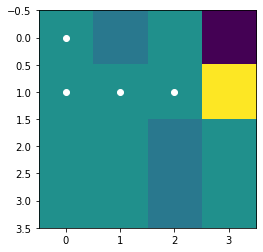

In [729]:
imshow(wumpusWorld)
plot(y,x,"ow")
print(w)

In [730]:
# here we can see how our Qtabel is Uppdated 
Qteble

array([[[-1000000.        ,    -5346.26159152,  -814877.42299375,
         -1000000.        ],
        [ -950000.15      , -1000000.        ,  -814506.80648125,
         -1000000.        ],
        [-1000000.        ,  -734827.51233184, -1000000.        ,
         -1000000.        ],
        [-1000000.        , -1000000.        , -1000000.        ,
         -1000000.        ]],

       [[-1000000.        ,  -902500.2925    ,    -5627.48588581,
          -773781.61615719],
        [ -773781.61615719,  -902500.2925    ,    -6278.11102861,
          -950100.05      ],
        [ -902500.2925    , -1000000.        ,    -4574.25690664,
          -902500.2925    ],
        [-1000000.        , -1000000.        , -1000000.        ,
         -1000000.        ]],

       [[-1000000.        , -1000000.        ,  -814506.80648125,
          -950000.15      ],
        [ -950000.15      ,  -598738.14302756, -1000000.        ,
          -950000.15      ],
        [-1000000.        , -1000000.        ,